In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [3]:
movie_data = pd.read_csv('TMBD Movie Dataset.csv')

We will be using profit and popularity as the main factors of success

In [8]:
profit = pd.DataFrame(movie_data['profit'])
popularity = pd.DataFrame(movie_data['popularity'])

We have filtered out the factors that we identified to have relevance to the success of a movie 

In [5]:
budget = pd.DataFrame(movie_data['budget'])
cast = pd.DataFrame(movie_data['cast'])
director = pd.DataFrame(movie_data['director'])
genres = pd.DataFrame(movie_data['genres'])
runtime = pd.DataFrame(movie_data['runtime'])
production_companies = pd.DataFrame(movie_data['production_companies'])
release_year = pd.DataFrame(movie_data['release_year'])
release_date = pd.DataFrame(movie_data['release_date'])
allfactors = movie_data[['budget', 'cast', 'director', 'genres', 'production_companies', 'release_year', 'release_date', 'runtime', 'popularity', 'profit']]

In [6]:
genres

,genres
0,Action|Adventure|Science Fiction|Thriller
1,Action|Adventure|Science Fiction|Thriller
2,Adventure|Science Fiction|Thriller
3,Action|Adventure|Science Fiction|Fantasy
4,Action|Crime|Thriller
...,...
1282,Adventure|Action|Thriller
1283,Adventure|Action|Thriller
1284,Adventure|Action|Thriller
1285,Horror|Thriller


In [7]:
allfactors.dropna()
allfactors = allfactors.reset_index(drop=True)
print(f"The shape of the new dataset: {allfactors.shape}")

#check for NULL values in entire dataframe
allfactors.isnull().values.any()

The shape of the new dataset: (1287, 10)


False

In [8]:
allfactors[['year', 'month', 'day']] = allfactors['release_date'].str.split('-', expand=True)
allfactors.drop(['year', 'day'], axis=1, inplace=True)
factors = allfactors[['budget', 'cast', 'director', 'genres', 'production_companies', 'release_year', 'release_date', 'runtime', 'month']]
success = allfactors[['popularity', 'profit']]

In [9]:
allfactors["cast"] = allfactors["cast"].str.split("|")
allfactors = allfactors.explode("cast")
allfactors["director"] = allfactors["director"].str.split("|")
allfactors = allfactors.explode("director")
allfactors

,budget,cast,director,genres,production_companies,release_year,release_date,runtime,popularity,profit,month
0,150000000.0,Chris Pratt,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Bryce Dallas Howard,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Irrfan Khan,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Vincent D'Onofrio,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Nick Robinson,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
...,...,...,...,...,...,...,...,...,...,...,...
1286,2700000.0,John Belushi,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,Tim Matheson,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,John Vernon,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,Verna Bloom,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07


In [9]:
def encodetable(y, separator): 
    options_list = []
    
    # iterate through data and find all available options
    for val in y:
        options = str(val).split(separator)
        options_list.append(options)
    
    # options_list is a list of list containing the avialable options
    # convert to single non-nested list &
    # convert that to set and back to list to remove redundant options
    options = list(set([val for option in options_list for val in option]))
    
    # sort the list so the DataFrame columns are sorted
    options.sort()
    
    # create an empty DataFrame with shape (len(y), len(options))
    df = pd.DataFrame(index=range(len(y)), columns=options)
    
    # intialize all values to 0
    for col in df.columns:
        df[col].values[:] = 0
    
    # set value to 1 if the option was selected
    for index, vals in enumerate(y):
        options = str(vals).split(separator)
        for val in options:
            df.at[index, val] = 1
    return df

In [22]:
# feature / one hot / label encoding

encodetable(factors['genres'], '|')

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1283,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1284,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1285,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


Step 2: Basic visualisation

In this section, we will perform data visualisation on the numeric and categorical variables within the dataset. This helps us better understand their breakdowns and sets us up for machine learning.

<Axes: >

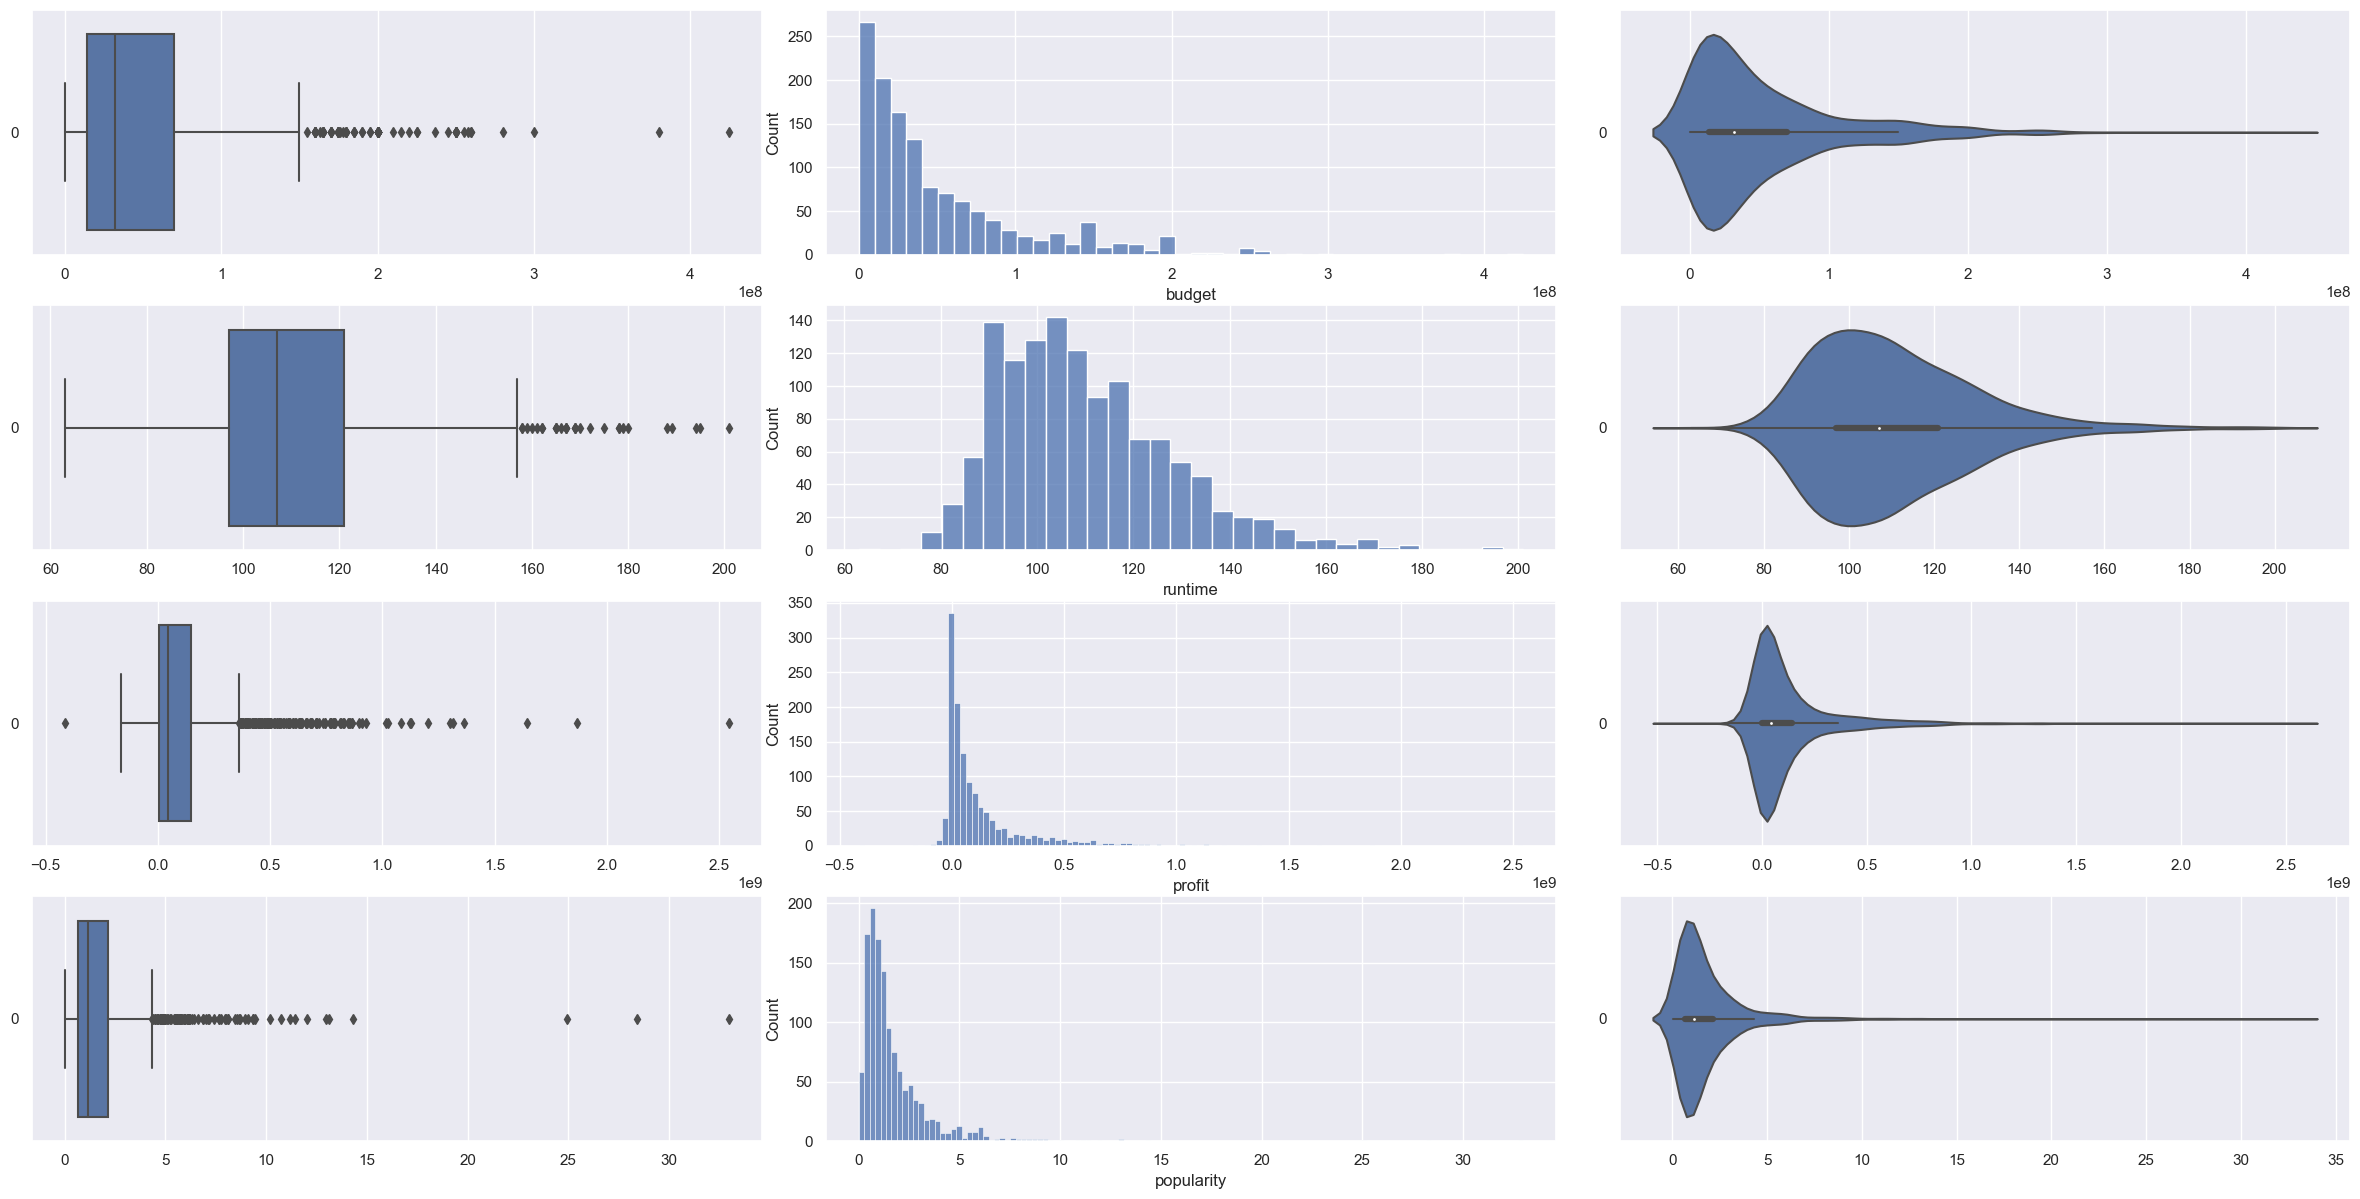

In [11]:
#large numeric data

f, axes = plt.subplots(4, 3, figsize=(24, 12))

# Format the layout so that no overlapping between titles and graphs
plt.tight_layout()

# Budget
sb.boxplot(data = factors["budget"], orient = "h", ax = axes[0,0])
sb.histplot(data = factors["budget"], ax = axes[0,1])
sb.violinplot(data = factors["budget"], orient = "h", ax = axes[0,2])


# Runtime
sb.boxplot(data = factors["runtime"], orient = "h", ax = axes[1,0])
sb.histplot(data = factors["runtime"], ax = axes[1,1])
sb.violinplot(data = factors["runtime"], orient = "h", ax = axes[1,2])



# Profit
sb.boxplot(data = success["profit"], orient = "h", ax = axes[2,0])
sb.histplot(data = success["profit"], ax = axes[2,1])
sb.violinplot(data = success["profit"], orient = "h", ax = axes[2,2])



# Popularity
sb.boxplot(data = success["popularity"], orient = "h", ax = axes[3,0])
sb.histplot(data = success["popularity"], ax = axes[3,1])
sb.violinplot(data = success["popularity"], orient = "h", ax = axes[3,2])

<Axes: xlabel='month', ylabel='popularity'>

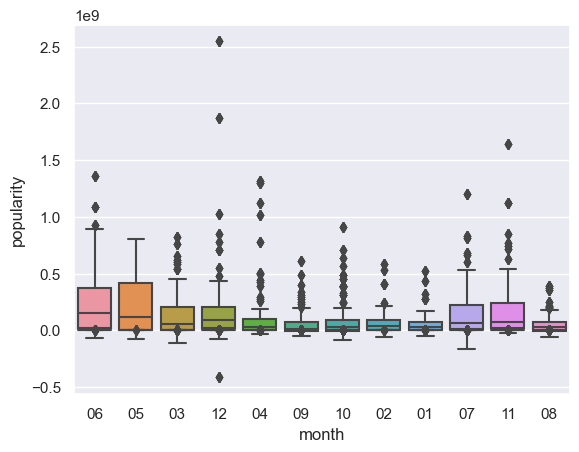

In [15]:
sb.boxplot(data=allfactors, x="month", y="popularity", orient = 'v')

<Axes: xlabel='month', ylabel='profit'>

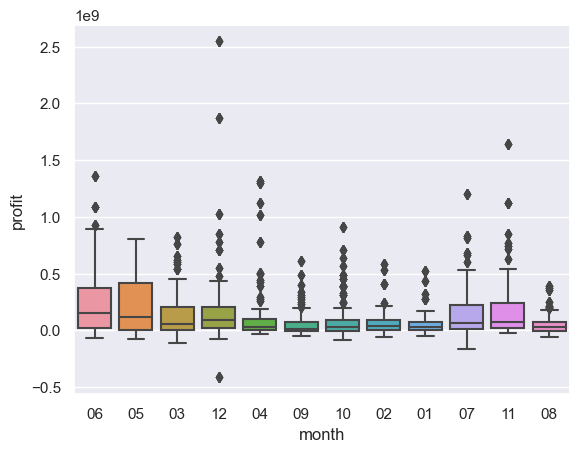

In [17]:
sb.boxplot(data=allfactors, x="month", y="profit", orient = 'v')

<Axes: xlabel='release_year', ylabel='profit'>

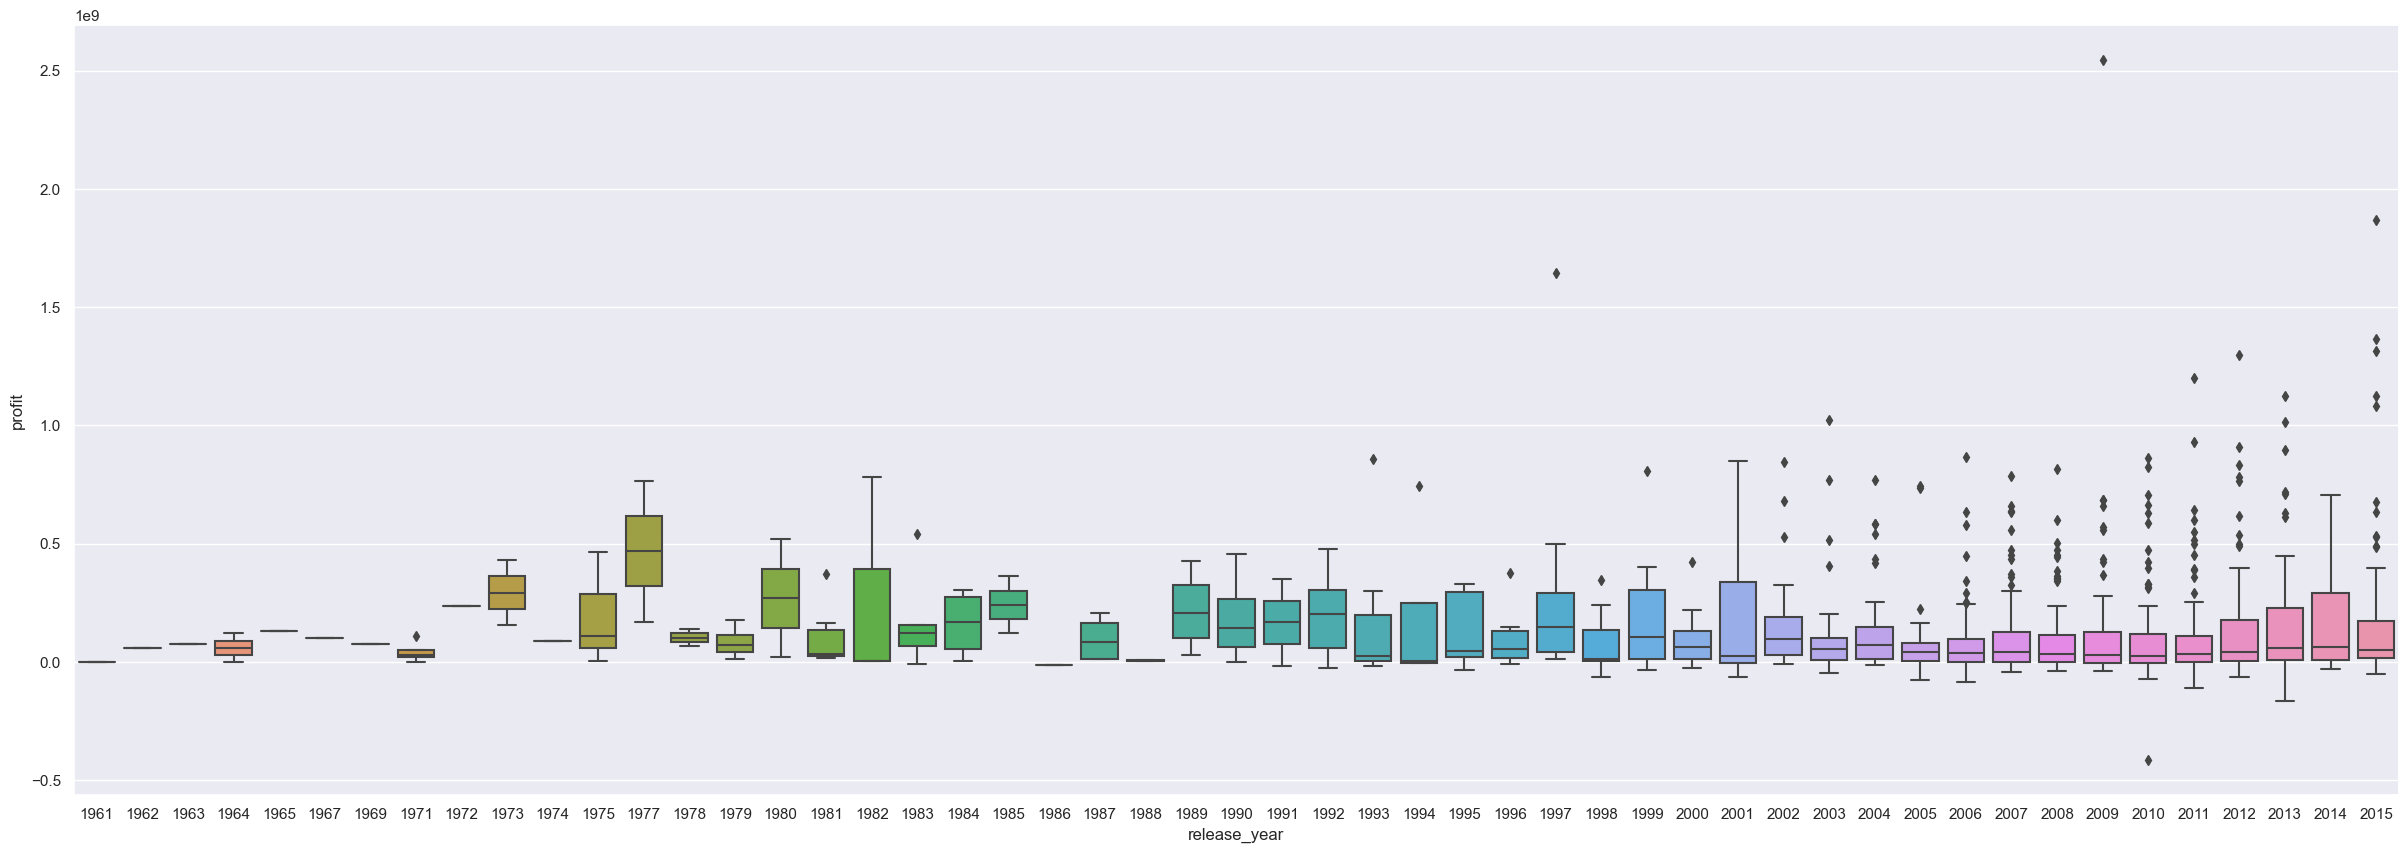

In [21]:
plt.figure(figsize=(30, 10))

sb.boxplot(data=movie_data, x="release_year", y="profit", orient = 'v')

seasonality test - on how the genres have changed over the years

In [12]:
allfactors.groupby('director')[['popularity']].mean().sort_values(['popularity'], ascending=False)

,popularity
director,
Colin Trevorrow,32.985763
George Miller,14.675428
Joe Russo|Anthony Russo,12.971027
Chad Stahelski|David Leitch,11.422751
Don Hall|Chris Williams,8.691294
...,...
Dan Cutforth|Jane Lipsitz,0.050524
Taika Waititi,0.028456
Nathan Frankowski,0.021371


In [13]:
allfactors.groupby('director')[['profit']].mean().sort_values(['profit'], ascending=False)


,profit
director,
Colin Trevorrow,1.363529e+09
Joss Whedon,1.212297e+09
Chris Buck|Jennifer Lee,1.124219e+09
Kyle Balda|Pierre Coffin,1.082731e+09
James Cameron,1.066388e+09
...,...
Steven Zaillian,-4.554910e+07
Lawrence Kasanoff,-6.492629e+07
James L. Brooks,-7.133109e+07


In [14]:
allfactors.groupby('cast')[['popularity']].mean().sort_values(['popularity'], ascending=False)

,popularity
cast,
Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,32.985763
Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,28.419936
Matthew McConaughey|Jessica Chastain|Anne Hathaway|Michael Caine|Casey Affleck,24.949134
Chris Pratt|Zoe Saldana|Dave Bautista|Vin Diesel|Bradley Cooper,14.311205
Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,13.112507
...,...
Owen Wilson|Vince Vaughn|Tiya Sircar|Rose Byrne|Josh Gad,0.040858
James Rolleston|Craig Hall|Taika Waititi|Te Aho Aho Eketone-Whitu|Ei Kura Albert,0.028456
Ben Stein|Richard Dawkins|William Dembski|Paul Zachary Myers,0.021371


In [15]:
allfactors.groupby('cast')[['profit']].mean().sort_values(['profit'], ascending=False)


,profit
cast,
Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez,2.544506e+09
Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,1.868178e+09
Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates,1.645034e+09
Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,1.363529e+09
Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,1.316249e+09
...,...
Heike Makatsch|Armin Rohde|David Oyelowo|Wilfried Hochholdinger|Edward Burns,-7.401036e+07
Hugh Jackman|Kate Winslet|Ian McKellen|Jean Reno|Bill Nighy,-8.454068e+07
Seth Green|Joan Cusack|Dan Fogler|Breckin Meyer|Elisabeth Harnois,-1.110072e+08


want to find the popularity and the profit betweent the director and the genre

In [ ]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
kmeans_model = KMeans(n_clusters=2)

# assign each data point to a cluster
dbscan_result = dbscan_model.fit_predict(training_data)

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_result == dbscan_clusters)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the DBSCAN plot
pyplot.show()